# Simple Linear Regression

Using a single feature and a label

Dataset - Salary Data

### Importing useful libraries

In [62]:
import numpy as np # simplifies representing arrays and performing linear algebra operations
import pandas as pd # provides an easy way to represent datasets in memory
# analysis and visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

In [63]:
sns.set_style("whitegrid") # to print the graphs in a white grid structure

### Reading the dataset

In [64]:
df = pd.read_csv("Salary_Data.csv")
print(df.shape) # printing the shape of the dataset
df.head() # displaying the first 5 feature examples of the dataset

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Checking if Null values are present

In [65]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Splitting the dataset into train set and test set

In [66]:
train = df.iloc[:20]
test = df.iloc[20:]
test

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


### Extracting the values of feature and target variables

In [67]:
X = train['YearsExperience'].values
y = train['Salary'].values

### Visualizing the distribution of the data elements

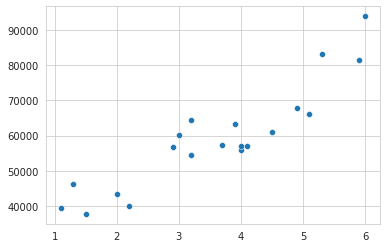

In [68]:
sns.scatterplot(x = X, y = y)

### Calculating the Coefficients

The equation for linear regression is:
>    `y = b0 + b1.X`

We will try to calculate b0 and b1 for given X and y.

We know that in regression analysis:

$$b1 = \frac{\sum\limits_{i = 1}^{n} [( X-X^{'} ) + (y-y^{'})]}{\sum\limits_{i = 1}^{n} ( X-X^{'} )^{2}}$$

and we can calculate b0 by substituting the value of b1 in the regression equation at (X', y'):
>    `b0 = y' - b1.X' `

In [69]:
# Mean of X and y
def mean(value):
    return np.mean(value)


# calculating the coefficients b0 and b1
def coef(X, y):
    numer = np.sum((X-mean(X)) * (y - mean(y)))
    denom = np.sum((X-mean(X))**2)
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)
    return b0, b1


# Making Predictions on the `test` Dataset

After calculating the coefficients b0 and b1, we calculate `yhat` using these coefficients but the x from our `test` dataset:
>    `yhat = b0 + b1.test_X`

We collect these `yhat` in predictions

In [70]:
def simple_linear_regression(X, y, test_x):
	predictions = list()
	b0, b1 = coef(X, y)
	for ax in test_x:
		yhat = b0 + b1 * ax
		predictions.append(yhat)
	return predictions

In [71]:
# printing the coefficients and the prediction
test_x = test['YearsExperience'].values
print(coef(X, y))
print(simple_linear_regression(X, y, test_x))

(27566.046546986043, 9116.114200692715)
[89555.6231116965, 92290.45737190431, 99583.34873245849, 102318.18299266629, 106876.24009301266, 109611.07435322047, 114169.13145356684, 115080.7428736361, 121462.02281412101, 123285.24565425955]


### Calculating the Root Mean Squared Error

The Root Mean Squared Error is defined as:
$$rmse = \sqrt{\frac{\sum\limits_{i=0}^{n} ( Y_{predicted}- Y_{actual} ) ^ 2}{n}}  $$

In [72]:
def rmse_metric(actual, predicted):
    sum_error = np.sum((predicted - actual) ** 2)
    mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

In [73]:
predicted = simple_linear_regression(X, y, test_x)
test_y = test['Salary'].values
error = rmse_metric(test_y, predicted)
error

4637.419530898866

### Visualizing the Model

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


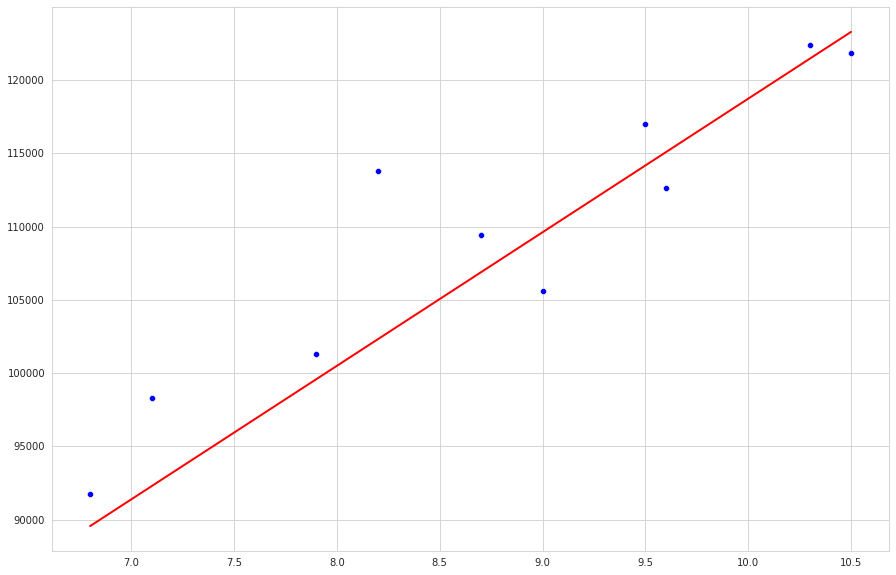

In [74]:
#visulaising the model
plt.figure(figsize=(15,10))
sns.scatterplot(test_x,test_y, color = 'blue')
sns.lineplot(test_x,predicted, color = 'red',linewidth = 2)